In [ ]:
from tensorflow.keras import Input, layers, losses, metrics
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import numpy.linalg as la 
import scipy.io
import matplotlib.pyplot as plt

# load training and test sets
mat = scipy.io.loadmat('17X')
x_train = np.transpose(mat['X2'])
mat_1 = scipy.io.loadmat('Y')
x_test = np.transpose(mat_1['Y'])

print('shape is',x_train.shape)


# degree of freedoms for CVs
encoding_dim = 2  


# set Input
input_img = Input(shape=(x_train.shape[1],))

# layers between input and bottleneck
encoded = layers.Dense(1000, activation='tanh')(input_img)
encoded_2 = layers.Dense(encoding_dim, activation='tanh')(encoded)

# set encoder
encoder = Model(input_img, encoded_2)

# set input for decoder
decoder_input = Input(shape=(encoding_dim,))

# Layers between bottleneck and output
decoded = layers.Dense(1000, activation='tanh')(decoder_input)
decoded_2 = layers.Dense(x_train.shape[1])(decoded)

# set decoder
decoder = Model(decoder_input,decoded_2)

# 
auto_encoder_input =  Input(shape=(x_train.shape[1],))
auto_encoder_encoder_out = encoder(auto_encoder_input)
auto_encoder_decoder_out = decoder(auto_encoder_encoder_out)
autoencoder = Model(auto_encoder_input, auto_encoder_decoder_out)

callback = EarlyStopping(monitor='val_loss', patience=50)


opt = optimizers.SGD(learning_rate=0.01)
autoencoder.compile(optimizer=opt, loss='mse')


history = autoencoder.fit(x_train, x_train,
                epochs=2000,
                batch_size=20,
                shuffle=True,
                callbacks=[callback],
                verbose=1,
                validation_data=(x_test, x_test))
# loss = 1/(M*d)* sum of squares of errors, where M is the size of training set and d is the dimension of input vector
# validation loss is defined similarly over the test set, instead of M, m as the size of test set

# Encoder and decoder
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

CV = encoder.predict(x_train)

file_name = 'CV.mat'
scipy.io.savemat(file_name, {'CV': CV})


plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.savefig('re01.png')
print('loss',x_train.shape[1]*history.history["loss"][-1])
print('Val_loss',x_train.shape[1]*history.history["val_loss"][-1])
print('relative_error',x_train.shape[0]*x_train.shape[1]*history.history["loss"][-1]/la.norm(x_train,'fro'))

shape is (580, 9)
Epoch 1/2000
29/29 [==============================] - 0s 5ms/step - loss: 1.7193 - val_loss: 0.7630
Epoch 2/2000
29/29 [==============================] - 0s 3ms/step - loss: 0.3706 - val_loss: 0.1297
Epoch 3/2000
29/29 [==============================] - 0s 2ms/step - loss: 0.0699 - val_loss: 0.0373
Epoch 4/2000
29/29 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.0277
Epoch 5/2000
29/29 [==============================] - 0s 2ms/step - loss: 0.0283 - val_loss: 0.0269
Epoch 6/2000
29/29 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0268
Epoch 7/2000
29/29 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0267
Epoch 8/2000
29/29 [==============================] - 0s 3ms/step - loss: 0.0280 - val_loss: 0.0267
Epoch 9/2000
29/29 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0266
Epoch 10/2000
29/29 [==============================] - 0s 2ms/step - loss: 0.0280 

In [41]:
import scipy.io

mat = scipy.io.loadmat('ircX')
ircx = np.transpose(mat['ircX'])
ircx = encoder.predict(ircx)

zircx = decoder.predict(ircx)


2/2 [==============================] - 0s 2ms/step
[[-0.92301416 -0.4034313 ]
 [-0.92346877 -0.40507635]
 [-0.9243596  -0.40476218]
 [-0.9282888  -0.41465953]
 [-0.932175   -0.41587904]
 [-0.935549   -0.40352628]
 [-0.9385288  -0.38213104]
 [-0.9411005  -0.35369095]
 [-0.94333875 -0.32030115]
 [-0.9453208  -0.28385663]
 [-0.9471313  -0.24452813]
 [-0.9487652  -0.20334205]
 [-0.9502436  -0.16002247]
 [-0.95167726 -0.11538866]
 [-0.95303524 -0.06946924]
 [-0.9542878  -0.02441861]
 [-0.955564    0.01707692]
 [-0.95670414  0.05999587]
 [-0.95758414  0.08914419]
 [-0.95867157  0.12787953]
 [-0.9589394   0.13587748]
 [-0.96001273  0.1745404 ]
 [-0.96112484  0.21297671]
 [-0.9622199   0.25031286]
 [-0.96317697  0.28340188]
 [-0.9632062   0.28513438]
 [-0.9642063   0.3187109 ]
 [-0.96428674  0.32165322]
 [-0.96453184  0.32949272]
 [-0.9645972   0.33327678]
 [-0.9648251   0.33983362]
 [-0.96497124  0.3446392 ]
 [-0.96506864  0.35024905]
 [-0.9653363   0.35697764]
 [-0.9653637   0.36043406]
 [-0

In [17]:
x = np.array([x_train[0,:]])
y = encoder.predict(x)
print(la.norm(x-decoder.predict(y))/la.norm(x))
print(y)
x = np.array([x_train[1,:]])
y = encoder.predict(x)
print(la.norm(x-decoder.predict(y))/la.norm(x))
print(y)


1/1 [==============================] - 0s 46ms/step
0.03126712075244628
[[ 0.41211256 -0.9301094 ]]
1/1 [==============================] - 0s 27ms/step
0.015394184412400357
[[-0.51332265 -0.97848415]]


In [27]:
import scipy.io

mat = scipy.io.loadmat('CV')
CV = mat['CV']
CV = decoder.predict(CV)
print(CV)

4/4 [==============================] - 0s 974us/step
[[1.3867327  1.0452847  2.0902176 ]
 [1.2069739  2.4495597  1.9418715 ]
 [1.389037   1.0458478  2.094421  ]
 [1.3904586  1.0523516  2.097835  ]
 [1.3912015  1.0624827  2.1004362 ]
 [1.3913435  1.0744019  2.1020813 ]
 [1.3912072  1.085273   2.1032984 ]
 [1.3913057  1.0951488  2.1047156 ]
 [1.391884   1.100889   2.1063974 ]
 [1.3923793  1.1028184  2.1075602 ]
 [1.3934755  1.0985713  2.109083  ]
 [1.3953426  1.0906266  2.111225  ]
 [1.3972163  1.0779128  2.1131306 ]
 [1.3996639  1.0584846  2.115192  ]
 [1.4023683  1.0372329  2.1175847 ]
 [1.4051335  1.012658   2.1195765 ]
 [1.4078445  0.98906994 2.1214921 ]
 [1.410132   0.9660751  2.1227527 ]
 [1.4118502  0.94624144 2.1235008 ]
 [1.4122283  0.93362445 2.1226249 ]
 [1.411278   0.9303861  2.1204848 ]
 [1.409063   0.9351254  2.1170335 ]
 [1.389163   1.0474857  2.0948322 ]
 [1.390688   1.0531719  2.0982935 ]
 [1.3920753  1.0601057  2.1017199 ]
 [1.393322   1.0667137  2.1046817 ]
 [1.3942072

In [43]:

# call two local minima
x_loc_1 = encoder.predict(np.array([x_train[0,:]]))
print(x_loc_1)
x_loc_2 = encoder.predict(np.array([x_train[1,:]]))
print(x_loc_2)
# window sizes in x- and y- directions
wx = 0.1
wy = 0.1
size = 21

# Generate intervals between two local minima

if x_loc_1[0][0] < x_loc_2[0][0]:
    x = np.linspace(x_loc_1[0][0]-wx, x_loc_2[0][0]+wx, num=size)
    print('loc_1(x)<loc_2(x)')
else:
    x = np.linspace(x_loc_2[0][0]-wx, x_loc_1[0][0]+wx, num=size)
    print('loc_2(x)<loc_1(x)')
    
if x_loc_1[0][1] < x_loc_2[0][1]:
    y = np.linspace(x_loc_1[0][1]-wy, x_loc_2[0][1]+wy, num=size)
    print('loc_1(y)<loc_2(y)')
else:
    y = np.linspace(x_loc_2[0][1]-wy, x_loc_1[0][1]+wy, num=size)
    print('loc_2(y)<loc_1(y)')

# 1-d grid points for CV in x- and y- directions    
cv = np.concatenate((np.array([x]),np.array([y])), axis=0)    

# reconstruct the preimages of grid points on CVs-plane into configuration space 
A = np.array([np.zeros(x_train.shape[1])])
for i in range(0,size):
    for j in range(0,size):
        pt = np.array([[x[i],y[j]]])
        A = np.concatenate((A,decoder.predict(pt)), axis=0)
        
A = np.transpose(A[1:,:])

scipy.io.savemat('cv.mat', {'cv': cv})
scipy.io.savemat('A.mat', {'A': A})  
print('done')

1/1 [==============================] - 0s 28ms/step
[[-0.92304915 -0.40347975]]
1/1 [==============================] - 0s 28ms/step
[[-0.971183   0.5571061]]
loc_2(x)<loc_1(x)
loc_1(y)<loc_2(y)
1/1 [==============================] - 0s 27ms/step
done


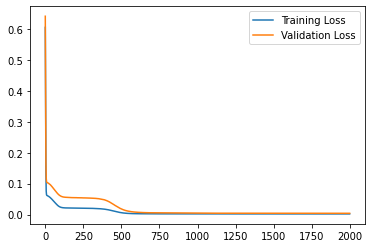

In [25]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.savefig('re01.png')

In [15]:
import scipy.io

mat = scipy.io.loadmat('ircX')
ircx = np.transpose(mat['ircX'])
cv = encoder.predict(ircx)
print(cv.shape)

# reconstruct the preimages of grid points on CVs-plane into configuration space 
A = decoder.predict(cv)
A = np.transpose(A)
cv = np.transpose(cv)

scipy.io.savemat('cv.mat', {'cv': cv})
scipy.io.savemat('A.mat', {'A': A})  

(58, 2)


In [14]:
mat = scipy.io.loadmat('ircX') 
irc = np.transpose(mat['ircX'])
irc_encoded = encoder.predict(irc)
irc_approx = decoder.predict(irc_encoded)
scipy.io.savemat('cv.mat', {'cv':irc_encoded})
scipy.io.savemat('A.mat', {'A':irc_approx})

print('mse is', la.norm(irc-irc_approx,'fro'))

mse is 2.180576092877867
